In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

data=pd.read_csv('Question3.csv',header=None)#.sample(frac=1).values
xin=data[[0,1]]
yout=data[[2]]
X=xin.to_numpy()
Y=yout.to_numpy()
Y[Y==0]=-1
X[5]

array([ 0.31739521, -0.52331519])

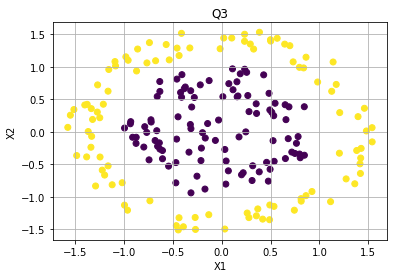

In [4]:
plt.scatter(X[:,0],X[:,1] , c=Y)
plt.grid()
plt.title("Q3")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [231]:
class Adaline:
  def __init__(self, b, w, alpha):
    self.alpha=alpha
    self.w=w
    self.b =b
  def net (self,xin):
    NET = np.dot(xin,self.w)+self.b
    return NET
#    return sum(i * w for i, w in zip(xin, self.w)) + self.b
  def h (self,xin):
    if self.net(xin)>=0:
      H=1
    else:
      H=-1
    return H
  def update(self , xin , t_out ):
      self.w = self.w + self.alpha*(t_out - self.net(xin))*xin
      self.b = self.b + self.alpha*(t_out - self.net(xin))

class Madaline:
  def __init__(self,neurons,alpha,dimension):
    self.neurons=neurons
    self.alpha=alpha
    self.dimension=dimension
    adalins=[]
    for i in range(neurons):
      adalins += [Adaline(np.random.rand(1) , np.random.rand(dimension), alpha)]
    self.adalins = adalins
  def out_madaline (self, x_in):
    n=[]
    t=-1
    for i in range(self.neurons):
      n +=[self.adalins[i].h(x_in)]
    #if sum(n) >= -1*(self.neurons-1) :
      if n[i]>= 0:
         t=1
    #print(n)
    return t
  def train(self,x_in,t_out ,max_epoch=1000):
   for epoch in range(max_epoch):
     e=0
     for k in range(len(x_in)):
       z_in=[]
       for i in range(self.neurons):
         z_in += [self.adalins[i].net(x_in[k])]
       y=self.out_madaline(x_in[k])
       if y != t_out[k] :
         e +=1
         if t_out[k]==1:
           zin=np.asarray(z_in)
           idx=np.argmin(abs(zin))
           self.adalins[idx].update(x_in[k],t_out[k])
         else:
           for l in range(len(z_in)):
             if z_in[l] >0:
               self.adalins[l].update(x_in[k],t_out[k])
     if e==1:
       return epoch
   return epoch

  def out_madaline_all (self ,X):
    y=[]
    for n in range(len(X)):
      y +=[self.out_madaline(X[n])]
    return y

In [196]:
n = 4
alpha = 0.1
model1 = Madaline(n, alpha, 2)
epochs = model1.train(X, Y, 4000)

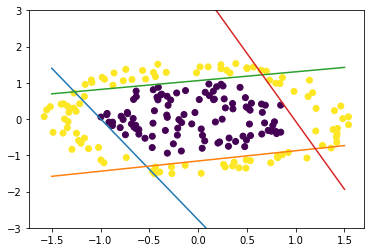

In [197]:
x_axis = np.linspace(-1.5,1.5,200)
networks = model1.adalins

for network in networks:
    y = -1 * ((x_axis *network.w[0])/network.w[1]) + (network.b/network.w[1]).T
    plt.plot(x_axis,y)
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.ylim([-3,3])
plt.show()
y_test =model1.out_madaline_all(X)
print("randeman baraye %i norons va %i epoch %f ast"%(n,epochs, accuracy_score(y_test, Y)))

In [232]:
n = 3
alpha = 0.5
model2 = Madaline(n, alpha, 2)
epochs = model2.train(X, Y, 2000)

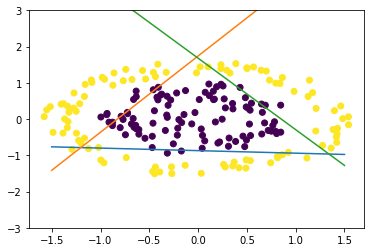

randeman baraye 3 norons va 1999 epoch 0.865000 ast


In [233]:
x_axis = np.linspace(-1.5,1.5,200)
networks = model2.adalins

for network in networks:
    y = -1 * ((x_axis *network.w[0])/network.w[1]) + (network.b/network.w[1]).T
    plt.plot(x_axis,y)
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.ylim([-3,3])
plt.show()
y_test =model2.out_madaline_all(X)
print("randeman baraye %i norons va %i epoch %f ast"%(n,epochs, accuracy_score(y_test, Y)))

In [216]:
n = 8
alpha = 0.5
model3 = Madaline(n, alpha, 2)
epochs = model3.train(X, Y, 00)

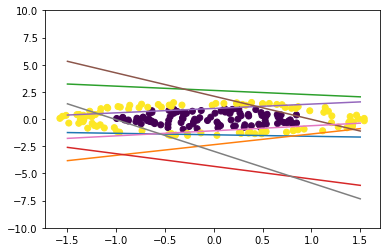

randeman baraye 3 norons va 1999 epoch 0.865000 ast


In [234]:
x_axis = np.linspace(-1.5,1.5,200)
networks = model3.adalins

for network in networks:
    y = -1 * ((x_axis *network.w[0])/network.w[1]) + (network.b/network.w[1]).T
    plt.plot(x_axis,y)
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.ylim([-10,10])
plt.show()
y_test =model2.out_madaline_all(X)
print("randeman baraye %i norons va %i epoch %f ast"%(n,epochs, accuracy_score(y_test, Y)))